In [1]:
import cPickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
def unpickle( file ):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle('data/cifar-10-batches-py/data_batch_1')
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[0:N,:] 
labels = labels[0:N,:]
 
# project down into a D-dimensional space
features = np.dot(features, np.random.randn( 3072, D))
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0))/np.std(features, axis=0)

In [3]:
score = lambda W: np.dot(features, W)

def numerical_gradient(f, W):
    h = 1e-6
    gradient = np.zeros_like(W)
    orig = f(W)
    for i in xrange(W.shape[0]): # rows
        for j in xrange(W.shape[1]): # columns
            W[i,j] += h
            gradient[i,j] = (f(W)-orig)/h
            W[i,j] -= h
    return gradient

def softmax(X):
    s = score(X)
    b = np.max(s, axis=0)
    z = -np.log(np.exp(s-b)/np.sum(np.exp(s-b))) # 1000 x 10
    L = np.choose(labels.ravel(), z.T)
    return np.mean(L)

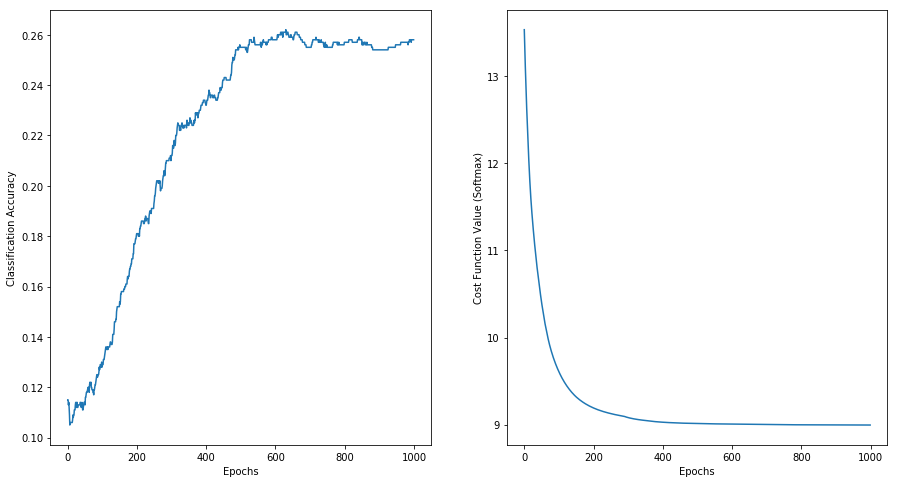

In [5]:
W = np.random.randn(10,10)
epochs = 1000
step_size = 0.1
accuracies = []
losses = []
for i in xrange(0, epochs):
    S = score(W)
    losses.append(softmax(W))
    output = np.argmax(S, axis=1)
    incorrect = np.nonzero(labels.ravel() - output)[0]
    accuracies.append(1. - len(incorrect)/float(len(labels)))
    grad = numerical_gradient(softmax, W)
    W -= step_size * grad

plt.subplot(121)
plt.plot(np.arange(0,epochs), accuracies)
plt.xlabel("Epochs")
plt.ylabel("Classification Accuracy")
plt.subplot(122)
plt.plot(np.arange(0,epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Cost Function Value (Softmax)")
plt.show()

## Autograd Extra Credit

In [12]:
import autograd.numpy as anp
from autograd import grad, elementwise_grad
from math import exp

In [15]:
score = lambda W: np.dot(features, W)

def numerical_gradient(f, W):
    h = 1e-6
    gradient = np.zeros_like(W)
    orig = f(W)
    for i in xrange(W.shape[0]): # rows
        for j in xrange(W.shape[1]): # columns
            W[i,j] += h
            gradient[i,j] = grad(W)
            W[i,j] -= h
    return gradient

def softmax(X):
    s = score(X)
    b = np.max(s, axis=0)
    z = -np.log(np.exp(s-b)/np.sum(np.exp(s-b))) # 1000 x 10
    L = np.choose(labels.ravel(), z.T)
    return np.mean(L)

softmax_grad = grad(softmax)

In [16]:
W = np.random.randn(10,10)
W = W.astype(np.float)
epochs = 20
step_size = 0.1
accuracies = []
losses = []
for i in xrange(0, epochs):
    S = score(W)
    losses.append(softmax(W))
    output = np.argmax(S, axis=1)
    incorrect = np.nonzero(labels.ravel() - output)[0]
    accuracies.append(1. - len(incorrect)/float(len(labels)))
    gradient = softmax_grad(W)
    W -= step_size * gradient

plt.subplot(121)
plt.plot(np.arange(0,epochs), accuracies)
plt.xlabel("Epochs")
plt.ylabel("Classification Accuracy")
plt.subplot(122)
plt.plot(np.arange(0,epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Cost Function Value (Softmax)")
plt.show()

AttributeError: 'FloatNode' object has no attribute 'exp'